In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
%matplotlib inline
%reload_ext autoreload
%autoreload 2


### Dataframe 1

In [41]:
#Matches dataframe
df1 = pd.read_csv("https://raw.githubusercontent.com/JPalfonsos/coder/main/WorldCupMatches.csv")
df1.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


#### Dataframe 1
### Progreso de la asistencia a los partidos de los mundicales desde sus inicios

Se aprecia que hubo un pico de asistencia entre 1990 y 2000, después de estos años la asistencia por partido incluyendo las finales no ha sido tan alta

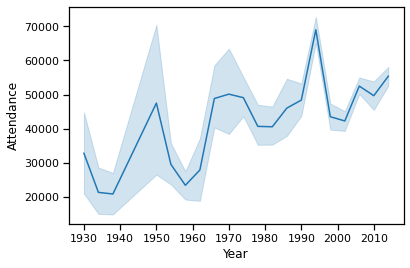

In [47]:
#Esta primera linea se hizo para que seaborn pusiera más años en el eje X
df1['Year'] = pd.to_datetime(df1['Year'], format = '%Y')
#Plot:
sns.lineplot(x="Year", y="Attendance", data=df1)

plt.show()

Revisando la dispersión de la asistencia:

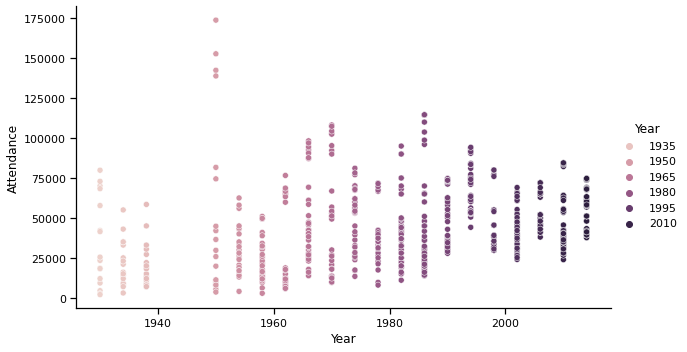

In [58]:
#aquí vuelvo a cargar la base, porque en la anterior gráfica modifiqué la columna de las fechas
df1 = pd.read_csv("https://raw.githubusercontent.com/JPalfonsos/coder/main/WorldCupMatches.csv")

sns.relplot(
    data=df1,
    x="Year", y="Attendance",
    hue="Year",aspect=1.75, facet_kws=dict(sharex=False))
plt.show()

### Dataframe 3, copas mundiales

In [9]:
#Cups dataframe
df3 = pd.read_csv("https://raw.githubusercontent.com/JPalfonsos/coder/main/WorldCups.csv")
df3

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


En promedio en una copa mundial se hacen entre todos los equipos 119 goles en total

In [10]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,20.0,1974.80,25.582889,1930.0,1957.0,1976.0,1995.00,2014.0
GoalsScored,20.0,118.95,32.972836,70.0,89.0,120.5,145.25,171.0
QualifiedTeams,20.0,21.25,7.268352,13.0,16.0,16.0,26.00,32.0
MatchesPlayed,20.0,41.80,17.218717,17.0,30.5,38.0,55.00,64.0


#### Countplot

Se aprecia que Brazil ha ganado más mundiales, después Italia y le sigue alemania

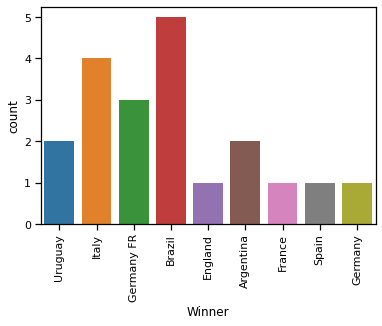

In [18]:
sns_context = sns.set_context("notebook",font_scale=1)
plt.xticks(rotation=90)
sns.countplot(data = df3, x = "Winner")
plt.show()


### ¿Cuántos partidos han jugado los ganadores?

Se aprecia que Brazil juega entre 30 y 50 partidos, mientras que Italia por copa aveces ha jugado 20 y aveces le ha tocado jugar 60, en cambio Uruguay, quienes han ganado dos copas solo han tenido que jugar 20 partidos.

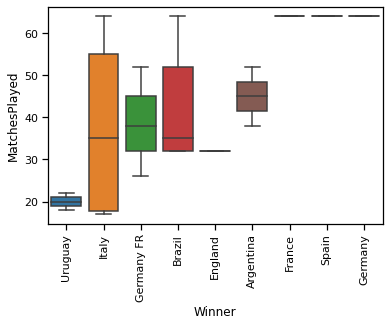

In [20]:
sns.boxplot(x= "Winner", y = "MatchesPlayed", data = df3)
plt.xticks(rotation=90)
plt.show()